In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import svm, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
import sklearn.linear_model as sk
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

In [42]:
df = pd.read_csv(r"property_data3.csv", index_col= 0)
df.head()

,classified_id,classified_type,classified_price,classified_zip,classified_kitchen_type,classified_building_constructionYear,classified_building_condition,classified_energy_heatingType,classified_certificates_primaryEnergyConsumptionLevel,classified_bedroom_count,classified_land_surface,classified_outdoor_terrace_exists,customer_id
Unnamed: 0,,,,,,,,,,,,,
0,10146915.0,apartment,339000,9890.0,hyperequipped,2021.0,asnew,gas,1.0,2.0,0.0,True,1989885.0
1,10156372.0,apartment,395000,1140.0,usahyperequipped,2022.0,asnew,gas,54.0,3.0,0.0,True,3845981.0
3,10157770.0,apartment,249000,1800.0,installed,2010.0,good,gas,88.0,2.0,0.0,True,1483.0
4,10157545.0,apartment,325000,8380.0,hyperequipped,1967.0,asnew,gas,99.0,2.0,0.0,True,285802.0
5,10157660.0,apartment,369000,9000.0,usahyperequipped,2007.0,good,gas,127.0,2.0,0.0,True,1989885.0


In [43]:
df.shape

(13389, 13)

In [44]:
df = df.drop(['classified_id','classified_zip',
              'customer_id','classified_land_surface'], axis=1)

In [45]:
#'classified_certificates_primaryEnergyConsumptionLevel'

In [46]:
df = df[df.classified_kitchen_type != "0"]

In [47]:
df['classified_kitchen_type'].unique()

array(['hyperequipped', 'usahyperequipped', 'installed', 'semiequipped',
       'usainstalled', 'notinstalled', 'usasemiequipped',
       'usauninstalled'], dtype=object)

In [48]:
df = df[(df.classified_kitchen_type != 'usahyperequipped') & (df.classified_kitchen_type != 'usainstalled') & (df.classified_kitchen_type != 'usasemiequipped') & (df.classified_kitchen_type != 'usauninstalled')]


In [49]:
df['classified_kitchen_type'].unique()

array(['hyperequipped', 'installed', 'semiequipped', 'notinstalled'],
      dtype=object)

In [50]:
df = df.drop_duplicates()

In [51]:
df.shape

(6979, 9)

In [52]:
df.head()

,classified_type,classified_price,classified_kitchen_type,classified_building_constructionYear,classified_building_condition,classified_energy_heatingType,classified_certificates_primaryEnergyConsumptionLevel,classified_bedroom_count,classified_outdoor_terrace_exists
Unnamed: 0,,,,,,,,,
0,apartment,339000,hyperequipped,2021.0,asnew,gas,1.0,2.0,True
3,apartment,249000,installed,2010.0,good,gas,88.0,2.0,True
4,apartment,325000,hyperequipped,1967.0,asnew,gas,99.0,2.0,True
7,apartment,595000,hyperequipped,1964.0,torenovate,gas,453.0,4.0,True
11,apartment,105000,semiequipped,1971.0,torenovate,gas,291.0,2.0,True


In [53]:
df.isnull().sum()

classified_type                                          0
classified_price                                         0
classified_kitchen_type                                  0
classified_building_constructionYear                     0
classified_building_condition                            0
classified_energy_heatingType                            0
classified_certificates_primaryEnergyConsumptionLevel    0
classified_bedroom_count                                 0
classified_outdoor_terrace_exists                        0
dtype: int64

In [54]:
df=df[~(df[df.columns[:0]]== 0).any(axis = 1)]
df

,classified_type,classified_price,classified_kitchen_type,classified_building_constructionYear,classified_building_condition,classified_energy_heatingType,classified_certificates_primaryEnergyConsumptionLevel,classified_bedroom_count,classified_outdoor_terrace_exists
Unnamed: 0,,,,,,,,,
0,apartment,339000,hyperequipped,2021.0,asnew,gas,1.0,2.0,True
3,apartment,249000,installed,2010.0,good,gas,88.0,2.0,True
4,apartment,325000,hyperequipped,1967.0,asnew,gas,99.0,2.0,True
7,apartment,595000,hyperequipped,1964.0,torenovate,gas,453.0,4.0,True
11,apartment,105000,semiequipped,1971.0,torenovate,gas,291.0,2.0,True
...,...,...,...,...,...,...,...,...,...
25254,house,299000,hyperequipped,0.0,asnew,gas,104.0,3.0,True
25279,house,350000,installed,0.0,asnew,gas,411.0,3.0,True
25286,house,365000,installed,0.0,good,gas,0.0,5.0,True


In [55]:
df['classified_type'].unique()

array(['apartment', 'house'], dtype=object)

In [56]:
df['classified_building_condition'].unique()

array(['asnew', 'good', 'torenovate', 'justrenovated', 'tobedoneup',
       'torestore'], dtype=object)

In [57]:
df['classified_energy_heatingType'].unique()

array(['gas', 'electric', 'fueloil', 'pellet', 'wood', 'solar', 'carbon'],
      dtype=object)

In [58]:
df.head()

,classified_type,classified_price,classified_kitchen_type,classified_building_constructionYear,classified_building_condition,classified_energy_heatingType,classified_certificates_primaryEnergyConsumptionLevel,classified_bedroom_count,classified_outdoor_terrace_exists
Unnamed: 0,,,,,,,,,
0,apartment,339000,hyperequipped,2021.0,asnew,gas,1.0,2.0,True
3,apartment,249000,installed,2010.0,good,gas,88.0,2.0,True
4,apartment,325000,hyperequipped,1967.0,asnew,gas,99.0,2.0,True
7,apartment,595000,hyperequipped,1964.0,torenovate,gas,453.0,4.0,True
11,apartment,105000,semiequipped,1971.0,torenovate,gas,291.0,2.0,True


In [59]:
type_dic={'house':1,'apartment':2}
condition_dic={'asnew':1,'good':2, 'torenovate':3, 'justrenovated':4, 'tobedoneup':5,
       'torestore':6}
kitchen_type_dic={'hyperequipped':1, 'installed':2, 'semiequipped':3,'notinstalled':4,}
#heating_type_dic={'gas':1, 'electric':2, 'fueloil':3}

In [60]:
df['classified_type'] = df['classified_type'].map(type_dic)
df['classified_building_condition'] = df['classified_building_condition'].map(condition_dic)
df['classified_kitchen_type'] = df['classified_kitchen_type'].map(kitchen_type_dic)
#df['classified_energy_heatingType'] = df['classified_energy_heatingType'].map(heating_type_dic)
df = pd.get_dummies(df, columns=['classified_outdoor_terrace_exists', 'classified_energy_heatingType'],drop_first=True)

df.head()

,classified_type,classified_price,classified_kitchen_type,classified_building_constructionYear,classified_building_condition,classified_certificates_primaryEnergyConsumptionLevel,classified_bedroom_count,classified_outdoor_terrace_exists_True,classified_energy_heatingType_electric,classified_energy_heatingType_fueloil,classified_energy_heatingType_gas,classified_energy_heatingType_pellet,classified_energy_heatingType_solar,classified_energy_heatingType_wood
Unnamed: 0,,,,,,,,,,,,,,
0,2,339000,1,2021.0,1,1.0,2.0,1,0,0,1,0,0,0
3,2,249000,2,2010.0,2,88.0,2.0,1,0,0,1,0,0,0
4,2,325000,1,1967.0,1,99.0,2.0,1,0,0,1,0,0,0
7,2,595000,1,1964.0,3,453.0,4.0,1,0,0,1,0,0,0
11,2,105000,3,1971.0,3,291.0,2.0,1,0,0,1,0,0,0


In [61]:
df.dtypes

classified_type                                            int64
classified_price                                           int64
classified_kitchen_type                                    int64
classified_building_constructionYear                     float64
classified_building_condition                              int64
classified_certificates_primaryEnergyConsumptionLevel    float64
classified_bedroom_count                                 float64
classified_outdoor_terrace_exists_True                     uint8
classified_energy_heatingType_electric                     uint8
classified_energy_heatingType_fueloil                      uint8
classified_energy_heatingType_gas                          uint8
classified_energy_heatingType_pellet                       uint8
classified_energy_heatingType_solar                        uint8
classified_energy_heatingType_wood                         uint8
dtype: object

<AxesSubplot:title={'center':'classified_price'}, xlabel='classified_type'>

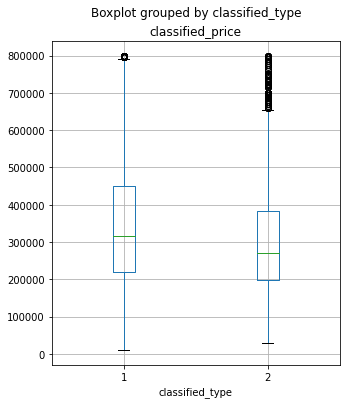

In [62]:
df.boxplot(column='classified_price', by='classified_type', figsize=(5,6))

<AxesSubplot:title={'center':'classified_price'}, xlabel='classified_building_condition'>

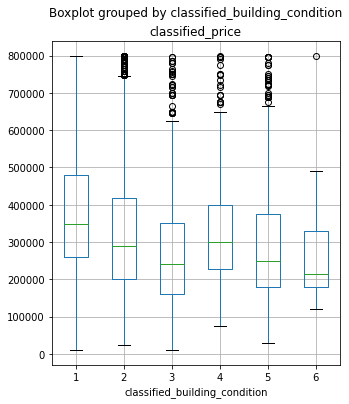

In [63]:
df.boxplot(column='classified_price', by='classified_building_condition', figsize=(5,6))

In [64]:
#df.boxplot(column='classified_price', by='classified_energy_heatingType', figsize=(5,6))

In [65]:
df['classified_price'].corr(df['classified_bedroom_count'])

0.41878821372701586

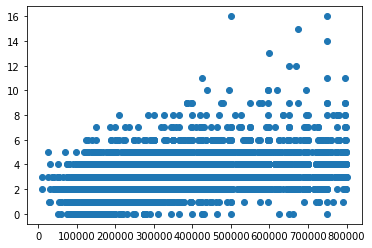

In [66]:
plt.scatter(df['classified_price'],df['classified_bedroom_count'])

In [67]:
df['classified_price'].corr(df['classified_building_constructionYear'])

0.2269032254103143

In [68]:
df['classified_price'].corr(df['classified_certificates_primaryEnergyConsumptionLevel'])

-0.032708576602086537

In [69]:
#plt.scatter(df['classified_price'],df['classified_certificates_primaryEnergyConsumptionLevel'])

In [70]:
x  = df.drop('classified_price', axis=1)
#x = sklearn.preprocessing.normalize(x)
y = df['classified_price']
x

,classified_type,classified_kitchen_type,classified_building_constructionYear,classified_building_condition,classified_certificates_primaryEnergyConsumptionLevel,classified_bedroom_count,classified_outdoor_terrace_exists_True,classified_energy_heatingType_electric,classified_energy_heatingType_fueloil,classified_energy_heatingType_gas,classified_energy_heatingType_pellet,classified_energy_heatingType_solar,classified_energy_heatingType_wood
Unnamed: 0,,,,,,,,,,,,,
0,2,1,2021.0,1,1.0,2.0,1,0,0,1,0,0,0
3,2,2,2010.0,2,88.0,2.0,1,0,0,1,0,0,0
4,2,1,1967.0,1,99.0,2.0,1,0,0,1,0,0,0
7,2,1,1964.0,3,453.0,4.0,1,0,0,1,0,0,0
11,2,3,1971.0,3,291.0,2.0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25254,1,1,0.0,1,104.0,3.0,1,0,0,1,0,0,0
25279,1,2,0.0,1,411.0,3.0,1,0,0,1,0,0,0
25286,1,2,0.0,2,0.0,5.0,1,0,0,1,0,0,0


In [71]:
#enc = OneHotEncoder(handle_unknown='ignore')
#enc.fit(x)
#x

In [72]:
#fig = plt.figure(figsize=(4,4))
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(df['classified_building_condition'],df['classified_type'],y)
#ax.scatter(x[:,1], x[:,2], y)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state=41, test_size=0.2)
print(X_train.shape)

(5583, 13)


In [83]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [84]:
reg.score(X_train, y_train)

0.3315173453585989

In [85]:
reg.score(X_test, y_test)

0.34812862209182505

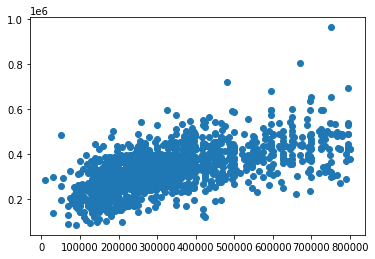

In [86]:
plt.scatter(y_test, reg.predict(X_test))